In [1]:
#Average Expenditure per Household in Canada
#build a model which predicts expenditure based on the money spent on such as Home Entertainment, Education, and Shelter


In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
df = pd.read_csv('./11100225.csv')
df

,REF_DATE,GEO,DGUID,Statistic,Household tenure,"Household expenditures, summary-level categories",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A000011124,Average expenditure per household,All classes,Total expenditure,Dollars,81,units,0,v54530454,1.1.1.1,72075.0,NaN,NaN,NaN,0
1,2010,Canada,2016A000011124,Average expenditure per household,All classes,Total current consumption,Dollars,81,units,0,v54530455,1.1.1.2,54013.0,NaN,NaN,NaN,0
2,2010,Canada,2016A000011124,Average expenditure per household,All classes,Food expenditures,Dollars,81,units,0,v54530456,1.1.1.3,7850.0,NaN,NaN,NaN,0
3,2010,Canada,2016A000011124,Average expenditure per household,All classes,Food purchased from stores,Dollars,81,units,0,v54530457,1.1.1.4,5709.0,NaN,NaN,NaN,0
4,2010,Canada,2016A000011124,Average expenditure per household,All classes,Bakery products,Dollars,81,units,0,v64476200,1.1.1.43,581.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,2019,Canada,2016A000011124,Average expenditure per household,Renter,Gifts of money and support payments,Dollars,81,units,0,v64477560,1.1.5.311,895.0,NaN,NaN,NaN,0
13822,2019,Canada,2016A000011124,Average expenditure per household,Renter,Gifts of money to persons living in Canada,Dollars,81,units,0,v64477561,1.1.5.312,381.0,NaN,NaN,NaN,0
13823,2019,Canada,2016A000011124,Average expenditure per household,Renter,Gifts of money to persons living outside Canada,Dollars,81,units,0,v64477562,1.1.5.313,286.0,NaN,NaN,NaN,0
13824,2019,Canada,2016A000011124,Average expenditure per household,Renter,Alimony and child support,Dollars,81,units,0,v64477563,1.1.5.314,228.0,NaN,NaN,NaN,0


In [4]:
df1 = df [['REF_DATE','Household tenure','Household expenditures, summary-level categories','VALUE']]

In [5]:
df2 = df1[(df1['Household tenure'] == 'Renter') & 
        ((df1['Household expenditures, summary-level categories'] == 'Shelter')|
        (df1['Household expenditures, summary-level categories'] == 'Education') |
        (df1['Household expenditures, summary-level categories'] == 'Home entertainment equipment'))]

In [6]:
df2.head(10)

,REF_DATE,Household tenure,"Household expenditures, summary-level categories",VALUE
1262,2010,Renter,Shelter,10885.0
1463,2010,Renter,Home entertainment equipment,330.0
1498,2010,Renter,Education,979.0
2817,2011,Renter,Shelter,11317.0
3018,2011,Renter,Home entertainment equipment,280.0
3053,2011,Renter,Education,1075.0
4372,2012,Renter,Shelter,11964.0
4573,2012,Renter,Home entertainment equipment,234.0
4608,2012,Renter,Education,1038.0
5927,2013,Renter,Shelter,11603.0


In [7]:
df2.columns

Index(['REF_DATE', 'Household tenure',
       'Household expenditures, summary-level categories', 'VALUE'],
      dtype='object')

In [8]:
df2.head()

,REF_DATE,Household tenure,"Household expenditures, summary-level categories",VALUE
1262,2010,Renter,Shelter,10885.0
1463,2010,Renter,Home entertainment equipment,330.0
1498,2010,Renter,Education,979.0
2817,2011,Renter,Shelter,11317.0
3018,2011,Renter,Home entertainment equipment,280.0


In [9]:
df2.shape

(27, 4)

In [10]:
#Checking for missing values
df2.isna().sum()

REF_DATE                                            0
Household tenure                                    0
Household expenditures, summary-level categories    0
VALUE                                               0
dtype: int64

In [11]:
#Checking for duplicate rows -Conclusion: There are no duplicate rows present in the dataset 
df2.duplicated().any()

False

/Users/ismailsever/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


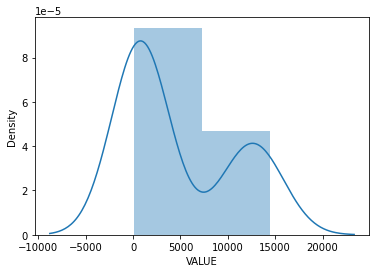

In [12]:
#Distribution of the target variable
sns.distplot(df2['VALUE']);

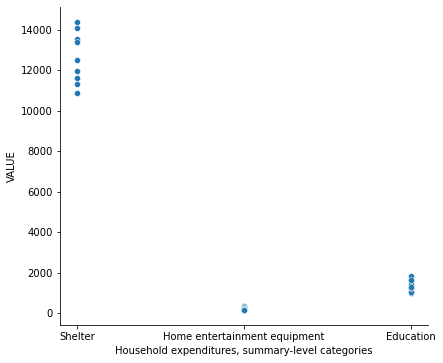

In [13]:
#Comparing Values that are related with other variables
g = sns.pairplot(df2, x_vars='Household expenditures, summary-level categories', y_vars='VALUE', aspect=1, kind='scatter',)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

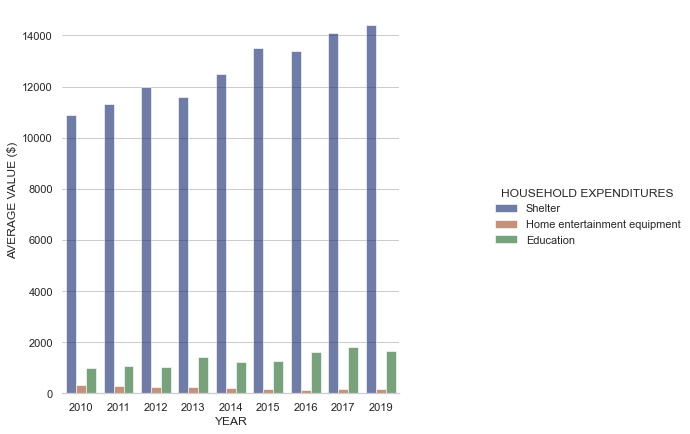

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a bar graph
g = sns.catplot(
    data=df2, kind="bar",
    x="REF_DATE", y="VALUE", hue="Household expenditures, summary-level categories",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("YEAR", "AVERAGE VALUE ($)")
g.legend.set_title("HOUSEHOLD EXPENDITURES")